In [98]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [99]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
data = [train, test]

# preview the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [101]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
train = train.drop(['PassengerId','Name','Ticket'], axis=1)
test    = test.drop(['Name','Ticket'], axis=1)

In [103]:
# for dataset in data:
#     dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

In [104]:
# for dataset in data:
#     dataset['IsAlone'] = 0
#     dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

In [105]:
# for dataset in data:
#     dataset['Embarked'] = dataset['Embarked'].fillna('S')
# print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

In [106]:
# for dataset in data:
#     dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
# train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
# print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

/Users/roni/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/roni/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/roni/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


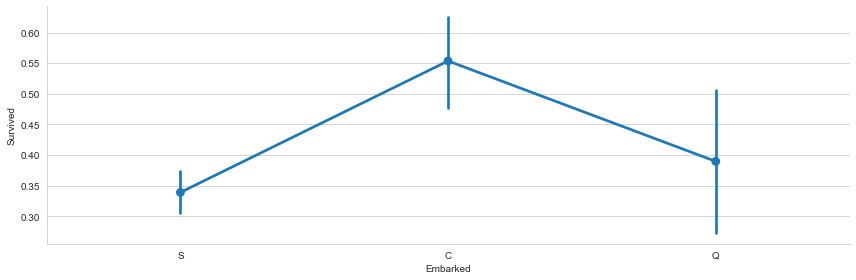

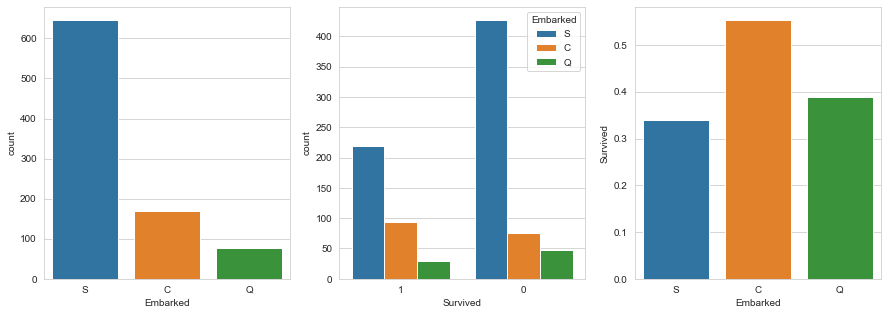

In [107]:
# Embarked

train["Embarked"] = train["Embarked"].fillna("S")

sns.factorplot('Embarked','Survived', data=train,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train, order=[1,0], ax=axis2)

embark_perc = train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

embark_dummies_titanic  = pd.get_dummies(train['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

train = train.join(embark_dummies_titanic)
test    = test.join(embark_dummies_test)

train.drop(['Embarked'], axis=1,inplace=True)
test.drop(['Embarked'], axis=1,inplace=True)

In [108]:
# Fare

# only for test, since there is a missing "Fare" values
test["Fare"].fillna(test["Fare"].median(), inplace=True)

# convert from float to int
train['Fare'] = train['Fare'].astype(int)
test['Fare']    = test['Fare'].astype(int)

# get fare for survived & didn't survive passengers
fare_not_survived = train["Fare"][train["Survived"] == 0]
fare_survived     = train["Fare"][train["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = data([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = data([fare_not_survived.std(), fare_survived.std()])

# plot
train['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

TypeError: 'list' object is not callable

In [ ]:
# Age

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in train
average_age_titanic   = train["Age"].mean()
std_age_titanic       = train["Age"].std()
count_nan_age_titanic = train["Age"].isnull().sum()

# get average, std, and number of NaN values in test
average_age_test   = test["Age"].mean()
std_age_test       = test["Age"].std()
count_nan_age_test = test["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
train["Age"][np.isnan(train["Age"])] = rand_1
test["Age"][np.isnan(test["Age"])] = rand_2

# convert from float to int
train['Age'] = train['Age'].astype(int)
test['Age']    = test['Age'].astype(int)

# plot new Age Values
train['Age'].hist(bins=70, ax=axis2# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
# test['Age'].hist(bins=70, ax=axis4)

In [ ]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [ ]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

In [ ]:
# Family

# Instead of having two columns Parch & SibSp,
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

# drop Parch & SibSp
train = train.drop(['SibSp','Parch'], axis=1)
test    = test.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=train,kind='count',ax=axis1)
sns.countplot(x='Family', data=train, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

train['Person'] = train[['Age','Sex']].apply(get_person,axis=1)
test['Person']    = test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(train['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train = train.join(person_dummies_titanic)
test    = test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=train,kind='count',ax=axis1)
sns.countplot(x='Person', data=train, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train.drop(['Person'],axis=1,inplace=True)
test.drop(['Person'],axis=1,inplace=True)

In [ ]:
# Pclass

# sns.factorplot('Pclass',data=train,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(train['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

train = train.join(pclass_dummies_titanic)
test    = test.join(pclass_dummies_test)

In [ ]:
# define training and testing sets

X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId",axis=1).copy()

In [ ]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=1000)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)